Ventas de Video Juegos

Tabla obtenida de Kaggle
Dataset contiene un listado de videojuegos con ventas mayores a 100,000 copias. Generado de un webscrap de vgchartz.com
https://www.kaggle.com/datasets/gregorut/videogamesales

Datos actualizados al 2016.

Analisis desde el punto de vista de empleado de PlayStation y ver donde se deben enfocar los próximos videojuegos y en que géneros

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Assign csv file containing vg dataset to the variable df (previously uploaded to personal Google Drive) and check the information format
df = pd.read_csv('G:/My Drive/Proyecto/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
#Check all the DataFrame information, shape: 11 columns, 16,598 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
#As an analyst for Playstation in this project I will be analyzing only Sony Playstation Sales
ps_df = df[(df['Platform'] == 'PS4') | (df['Platform'] == 'PS3') | (df['Platform'] == 'PS2') | (df['Platform'] == 'PS')]
ps_df.sort_values('Global_Sales', ascending= False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24


In [9]:
#Initial exploratory analysis. 5022 rows (some missing values). Year has a float format. 
ps_df.info()
ps_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 5022 entries, 16 to 16595
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          5022 non-null   int64  
 1   Name          5022 non-null   object 
 2   Platform      5022 non-null   object 
 3   Year          4956 non-null   float64
 4   Genre         5022 non-null   object 
 5   Publisher     5014 non-null   object 
 6   NA_Sales      5022 non-null   float64
 7   EU_Sales      5022 non-null   float64
 8   JP_Sales      5022 non-null   float64
 9   Other_Sales   5022 non-null   float64
 10  Global_Sales  5022 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 470.8+ KB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,5022.000000,4956.000000,5022.000000,5022.000000,5022.000000,5022.000000,5022.000000
mean,7182.668061,2005.352704,0.280647,0.203166,0.074335,0.083560,0.641625
std,4685.294425,5.715019,0.570010,0.480181,0.217219,0.267172,1.237119
min,17.000000,1994.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,3108.750000,2001.000000,0.010000,0.010000,0.000000,0.010000,0.090000
50%,6648.500000,2005.000000,0.090000,0.060000,0.000000,0.020000,0.250000
75%,10971.250000,2010.000000,0.280000,0.187500,0.050000,0.070000,0.650000
max,16598.000000,2017.000000,9.430000,9.270000,4.100000,10.570000,21.400000


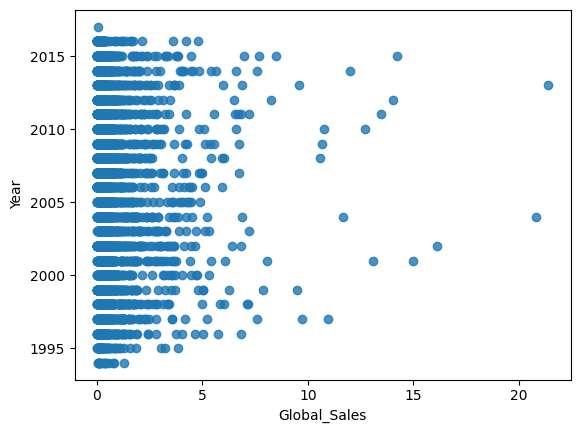

In [10]:
#Double check visually
sns.regplot(x = ps_df['Global_Sales'], y = ps_df['Year'], fit_reg = False)
plt.show()
#sns.boxplot(data= df, y = 'Global_Sales')


In [11]:
#Function to search an API on https://rawg.io/ to find the missing release year of the games.
#Function was created with the assistance of ChatGPT

import requests

# Replace 'YOUR_RAWG_API_KEY' with your actual RAWG API key
RAWG_API_KEY = '284f997010e446a6a4782c2f1e11f196'

# List of game names
games = [
    'Madden NFL 2004', 'FIFA Soccer 2004', 'wwe Smackdown vs. Raw 2006', 'Rock Band',
    'Triple Play 99', 'NASCAR Thunder 2003', 'Rock Band', 'Legacy of Kain: Soul Reaver',
    'Suikoden III', 'Yakuza 4', 'LEGO Harry Potter: Years 5-7', 'Wheel of Fortune',
    'The Lord of the Rings: War in the North', 'MLB SlugFest 20-03', 'Test Drive Unlimited 2',
    'Monster Hunter 2', 'NASCAR: Dirt to Daytona', 'Sonic the Hedgehog', 'NFL GameDay 2003',
    'Silent Hill: Homecoming', 'Harvest Moon: Save the Homeland', 'Robert Ludlum\'s The Bourne Conspiracy',
    'Final Fantasy XI', 'All-Star Baseball 2005', 'The Dukes of Hazzard II: Daisy Dukes It Out',
    'Haven: Call of the King', 'Rock Revolution', 'Jonah Lomu Rugby Challenge', 'College Hoops 2K6',
    'Mega Man X Collection', 'Singularity', 'Jet X20', 'Tribes: Aerial Assault', 'Move Fitness',
    'Yu Yu Hakusho: Dark Tournament', 'WRC: FIA World Rally Championship', 'Twisted Metal: Small Brawl',
    'NBA Starting Five', 'Backbreaker', 'James Cameron\'s Dark Angel', 'Sword of the Samurai',
    'Splatterhouse', 'Alone in the Dark: The New Nightmare', 'eJay Clubworld', 'Bejeweled 3',
    'Record of Agarest War Zero', 'Saru! Get You! Million Monkeys', 'Star Trek: Conquest', 'Happy Feet Two',
    'Demon Chaos', 'Action Man-Operation Extreme', 'McFarlane\'s Evil Prophecy', 'Port Royale 3',
    'Combat Elite: WWII Paratroopers', 'Mountain Bike Adrenaline', 'Battle vs. Chess',
    'The History Channel: Great Battles - Medieval', 'Monster Hunter Frontier Online', 'B.L.U.E.: Legend of Water',
    'Sega Rally 2006', 'Samurai Spirits: Tenkaichi Kenkakuden', 'Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku',
    'Cabela\'s Alaskan Adventure', 'Virtua Quest', 'Agarest Senki: Re-appearance', 'Hakuouki: Shinsengumi Kitan'
]

def get_game_release_year(game_name):
    url = f'https://api.rawg.io/api/games?search={game_name}&key={RAWG_API_KEY}'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        if 'results' in data and data['results']:
            release_year = data['results'][0].get('released')
            if release_year:
                return release_year[:4]
            else:
                print(f"Release year not found for {game_name}.")
        else:
            print(f"Data not found for {game_name}.")
    else:
        print(f"Error fetching data for {game_name}. Status code: {response.status_code}")
        print("Response text:", response.text)

    return None

# Create an empty dictionary to store the game names and release years
games_release_years = {}

# Get release years for each game and save them in the dictionary
for game in games:
    release_year = get_game_release_year(game)
    games_release_years[game] = release_year

# Print the dictionary with game names and release years
#for game, release_year in games_release_years.items():
#    print(f"{game}: {release_year}")

Release year not found for McFarlane's Evil Prophecy.
Release year not found for Combat Elite: WWII Paratroopers.


In [12]:
#Two games were not found on the API: McFarlane's Evil Prophecy (2004) and Combat Elite: WWII Paratroopers (2005), these were changed manually

#games_release_years['McFarlane's Evil Prophecy']
                    
games_release_years.update({"McFarlane\'s Evil Prophecy": "2004","Combat Elite: WWII Paratroopers": "2005",})
print(games_release_years['McFarlane\'s Evil Prophecy'])
print(games_release_years['Combat Elite: WWII Paratroopers'])

2004
2005


In [13]:
#Fill empty values of year with the dictionary games_release_years previously filled and replace Publisher values with "Unknown"
ps_df['Year'] = ps_df['Year'].fillna(ps_df['Name'].map(games_release_years))
ps_df['Publisher'] = ps_df['Publisher'].fillna('Unknown')
ps_df.isnull().sum()

C:\Users\gregl\AppData\Local\Temp\ipykernel_15644\4186837018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps_df['Year'] = ps_df['Year'].fillna(ps_df['Name'].map(games_release_years))
C:\Users\gregl\AppData\Local\Temp\ipykernel_15644\4186837018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps_df['Publisher'] = ps_df['Publisher'].fillna('Unknown')


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [14]:
#Check again all DataFrame's info
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5022 entries, 16 to 16595
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          5022 non-null   int64  
 1   Name          5022 non-null   object 
 2   Platform      5022 non-null   object 
 3   Year          5022 non-null   object 
 4   Genre         5022 non-null   object 
 5   Publisher     5022 non-null   object 
 6   NA_Sales      5022 non-null   float64
 7   EU_Sales      5022 non-null   float64
 8   JP_Sales      5022 non-null   float64
 9   Other_Sales   5022 non-null   float64
 10  Global_Sales  5022 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 470.8+ KB


In [17]:
ps_df = ps_df.astype({'Year': 'int'})
ps_df['Year']

16       2013
17       2004
24       2002
28       2001
33       2015
         ... 
16561    2008
16570    2016
16572    2008
16580    2008
16595    2008
Name: Year, Length: 5022, dtype: int32

In [18]:
#Check again all DataFrame's info, changed Year to integer
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5022 entries, 16 to 16595
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          5022 non-null   int64  
 1   Name          5022 non-null   object 
 2   Platform      5022 non-null   object 
 3   Year          5022 non-null   int32  
 4   Genre         5022 non-null   object 
 5   Publisher     5022 non-null   object 
 6   NA_Sales      5022 non-null   float64
 7   EU_Sales      5022 non-null   float64
 8   JP_Sales      5022 non-null   float64
 9   Other_Sales   5022 non-null   float64
 10  Global_Sales  5022 non-null   float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 451.2+ KB


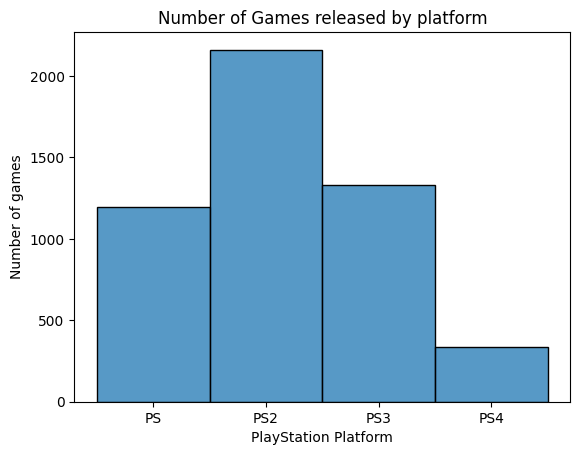

In [32]:
#Start exploratory graphs

sns.histplot(x=ps_df['Platform'].sort_values())

plt.title("Releases by platform")
plt.xlabel("PlayStation Platform")
plt.ylabel("Number of games")

plt.show()

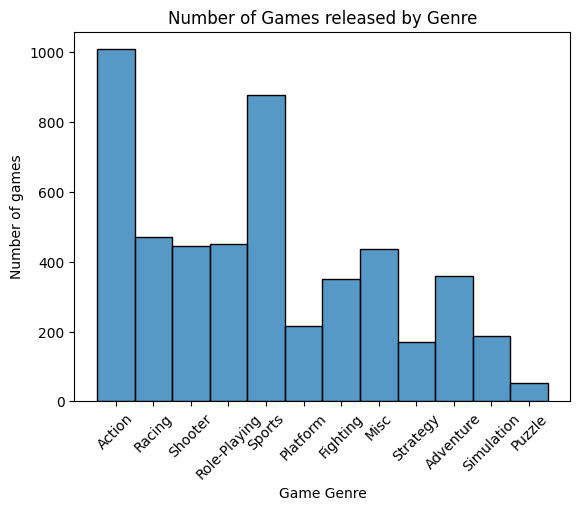

In [43]:
sns.histplot(x=ps_df['Genre'])

plt.title("Releases by Genre")
plt.xlabel("Game Genre")
plt.ylabel("Number of games")
plt.xticks(rotation=45)

plt.show()

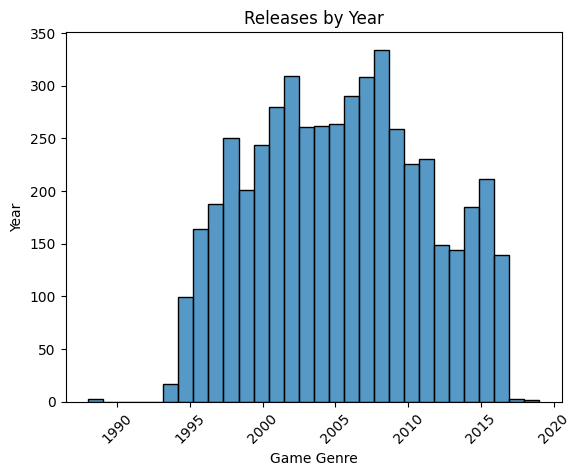

In [87]:
sns.histplot(x=ps_df['Year'])

plt.title("Releases by Year")
plt.xlabel("Game Genre")
plt.ylabel("Year")
plt.xticks(rotation=45)

plt.show()

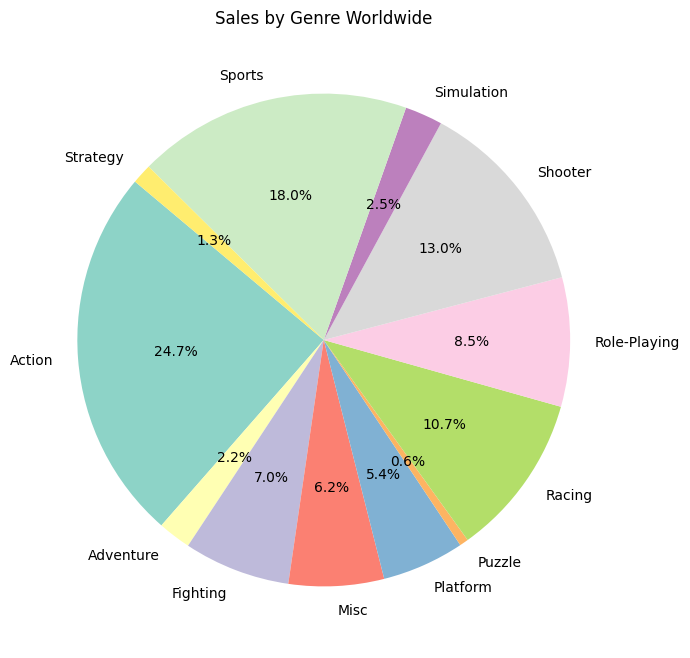

In [83]:
#Group the DataFrame by genre to see which genre is leading sales
sales_per_genre_ww = ps_df.groupby('Genre')['Global_Sales'].sum().reset_index()

custom_palette = sns.color_palette('Set3')

plt.figure(figsize= (8, 8))
plt.pie(sales_per_genre_ww['Global_Sales'], labels= sales_per_genre_ww['Genre'], autopct= '%1.1f%%', startangle= 140, colors= custom_palette)

plt.title("Sales by Genre Worldwide")
plt.show()

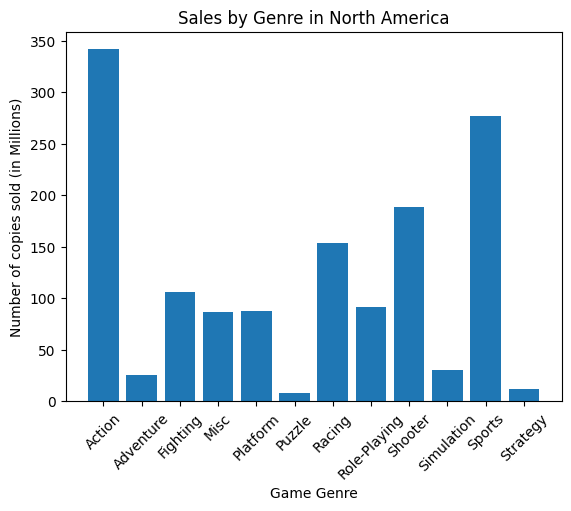

In [58]:
#Group the DataFrame by genre to see which genre is leading sales
sales_per_genre_na = ps_df.groupby('Genre')['NA_Sales'].sum().reset_index()

plt.bar(sales_per_genre_na['Genre'], sales_per_genre_na['NA_Sales'])

plt.title("Sales by Genre in North America")
plt.xlabel("Game Genre")
plt.ylabel("Number of copies sold (in Millions)")
plt.xticks(rotation=45)

plt.show()

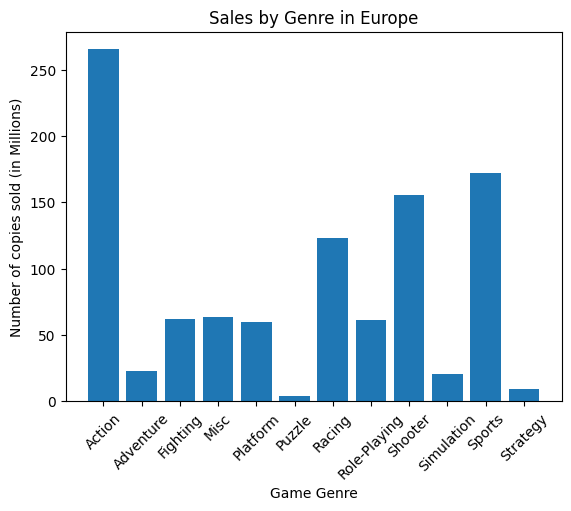

In [59]:
#Group the DataFrame by genre to see which genre is leading sales
sales_per_genre_na = ps_df.groupby('Genre')['EU_Sales'].sum().reset_index()

plt.bar(sales_per_genre_na['Genre'], sales_per_genre_na['EU_Sales'])

plt.title("Sales by Genre in Europe")
plt.xlabel("Game Genre")
plt.ylabel("Number of copies sold (in Millions)")
plt.xticks(rotation=45)

plt.show()

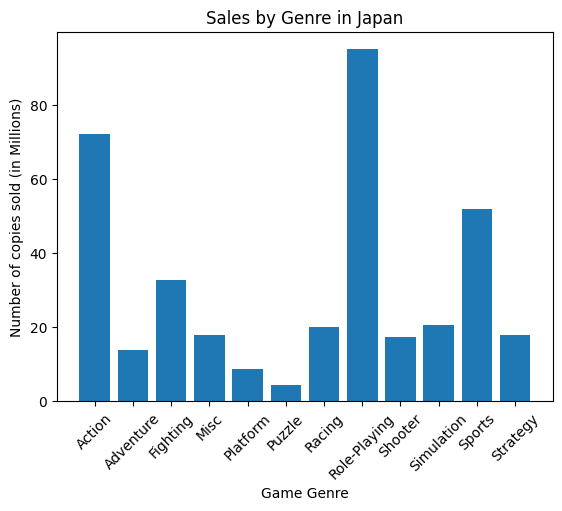

In [60]:
#Group the DataFrame by genre to see which genre is leading sales
sales_per_genre_na = ps_df.groupby('Genre')['JP_Sales'].sum().reset_index()

plt.bar(sales_per_genre_na['Genre'], sales_per_genre_na['JP_Sales'])

plt.title("Sales by Genre in Japan")
plt.xlabel("Game Genre")
plt.ylabel("Number of copies sold (in Millions)")
plt.xticks(rotation=45)

plt.show()

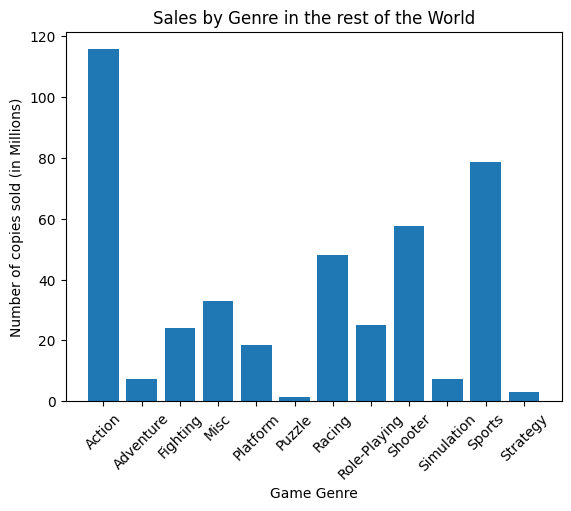

In [61]:
#Group the DataFrame by genre to see which genre is leading sales
sales_per_genre_na = ps_df.groupby('Genre')['Other_Sales'].sum().reset_index()

plt.bar(sales_per_genre_na['Genre'], sales_per_genre_na['Other_Sales'])

plt.title("Sales by Genre in the rest of the World")
plt.xlabel("Game Genre")
plt.ylabel("Number of copies sold (in Millions)")
plt.xticks(rotation=45)

plt.show()

In [91]:
#Survey the best selling games on the top categories
ps_df[ps_df['Genre'] == "Action"].sort_values('Global_Sales', ascending= False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
44,45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98


In [92]:
ps_df[ps_df['Genre'] == "Sports"].sort_values('Global_Sales', ascending= False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
112,113,FIFA 14,PS3,2013,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
121,122,FIFA 12,PS3,2011,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69
124,125,FIFA 15,PS4,2014,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59
179,180,Madden NFL 2004,PS2,2003,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23


In [94]:
ps_df[ps_df['Genre'] == "Shooter"].sort_values('Global_Sales', ascending= False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
37,38,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
55,56,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,Activision,4.99,3.69,0.38,1.63,10.69


In [95]:
ps_df[ps_df['Genre'] == "Racing"].sort_values('Global_Sales', ascending= False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
28,29,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
47,48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
52,53,Gran Turismo,PS,1997,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95
54,55,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
69,70,Gran Turismo 2,PS,1999,Racing,Sony Computer Entertainment,3.88,3.42,1.69,0.50,9.49


In [97]:
ps_df[ps_df['Genre'] == "Role-Playing"].sort_values('Global_Sales', ascending= False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
66,67,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
86,87,Final Fantasy X,PS2,2001,Role-Playing,Sony Computer Entertainment,2.91,2.07,2.73,0.33,8.05
87,88,Final Fantasy VIII,PS,1999,Role-Playing,SquareSoft,2.28,1.72,3.63,0.23,7.86
109,110,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
126,127,The Elder Scrolls V: Skyrim,PS3,2011,Role-Playing,Bethesda Softworks,2.55,2.71,0.25,1.05,6.56


Conclusiones y recomendaciones:

Las cinco categorías mas fuertes en ventas a nivel mundial son:
    -Acción
    -Deportes
    -Shooters (Tiradores)
    -Carreras
    -RPG (Juegos de Rol)
Todos los géneros tienen una franquicia que sobresale en ventas de las demás:
    -Acción         --> Grand Theft Auto
    -Deportes       --> Fifa
    -Shooters       --> Call of Duty
    -Carreras       --> Gran Turismo
    -RPG            --> Final Fantasy 
Se debe de hacer un enfoque en estos 5 géneros de juegos pero con mercadeos focalizados:
    -Los RPG tienen mucha demanda en Japón y es un mercado muy atractivo
    -Los juegos de Acción son los más populares en todos los mercados (excepto Japón)

Estas son las franquicias en que se deberían de enfocar las casas productoras de video juegos.